In [50]:
pip install numpy==1.22.1

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns



In [52]:
data_train= pd.read_csv("train.csv")

In [53]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [54]:
data_train.shape


(14999, 9)

In [55]:
# assigning numbers to categorial features
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train['category']=data_train['category'].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [56]:
data_train=data_train [data_train.views!='F']
data_train=data_train [data_train. likes!='F'] 
data_train=data_train [data_train.dislikes!='F']
data_train=data_train [data_train.comment!='F']

In [57]:
#Convert values to integers for views, likes, comments, dislikes and adview 
data_train["views"]= pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train ["likes"] =pd.to_numeric(data_train["likes"])
data_train ["dislikes"] =pd.to_numeric(data_train["dislikes"])
data_train["adview "]=pd.to_numeric(data_train ["adview"])

In [58]:
column_vidid=data_train['vidid']

In [59]:
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid']) 
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

In [60]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category,adview
0,5912,40,1031602,8523,363,1095,2168,2925,6,40
1,2741,2,1707,56,2,6,2185,3040,4,2
2,8138,1,2023,25,0,2,2094,1863,3,1
3,9005,6,620860,777,161,153,2119,2546,8,6
4,122,1,666,1,0,0,2091,1963,4,1


In [61]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   vidid      14637 non-null  int32
 1   adview     14637 non-null  int64
 2   views      14637 non-null  int64
 3   likes      14637 non-null  int64
 4   dislikes   14637 non-null  int64
 5   comment    14637 non-null  int64
 6   published  14637 non-null  int32
 7   duration   14637 non-null  int32
 8   category   14637 non-null  int64
 9   adview     14637 non-null  int64
dtypes: int32(3), int64(7)
memory usage: 1.1 MB


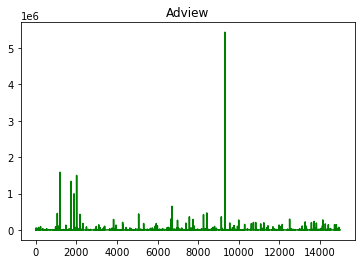

In [62]:
plt.plot(data_train['adview'], color='green')
plt.title('Adview')
plt.show()

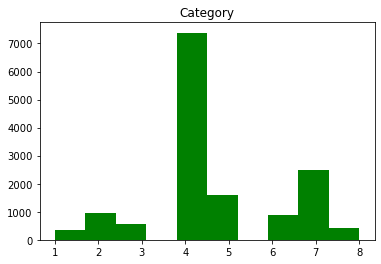

In [63]:
plt.hist(data_train['category'], color='green') 
plt.title('Category')
plt.show()
     

In [64]:
# Convert Time_in_sec for duration
import datetime
import time

def checki(x):
 y = x[2:]
 h = ''
 m = ''
 s = ''
 mm = ''
 P = ['H','M','S']
 for i in y:
  if i not in P:
   mm+=i
  else:
   if (i=="H"):
    h = mm 
    mm = ''
   elif (i == "M"):
    m = mm
    mm = ''
   else:
    s = mm
    mm = ''
 if (h==''):
  h = '00'
 if (m == ''):
  m = '00'
 if (s==''):
  s='00'
 bp = h+':'+m+':'+s
 return bp

train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
 h, m, s = time_string.split(':')
 return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train

,vidid,adview,views,likes,dislikes,comment,published,duration,category,adview
0,5912,40,1031602,8523,363,1095,2168,457,6,40
1,2741,2,1707,56,2,6,2185,570,4,2
2,8138,1,2023,25,0,2,2094,136,3,1
3,9005,6,620860,777,161,153,2119,262,8,6
4,122,1,666,1,0,0,2091,31,4,1
...,...,...,...,...,...,...,...,...,...,...
14994,9869,2,525949,1137,83,86,1683,370,1,2
14995,11758,1,665673,3849,156,569,1838,236,4,1
14996,13263,4,3479,16,1,1,1053,193,2,4
14997,6736,1,963,0,0,0,222,26,7,1


In [65]:
corelation = data_train.corr()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_30636/4257240550.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corelation, mask=np.zeros_like(corelation, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot=True)


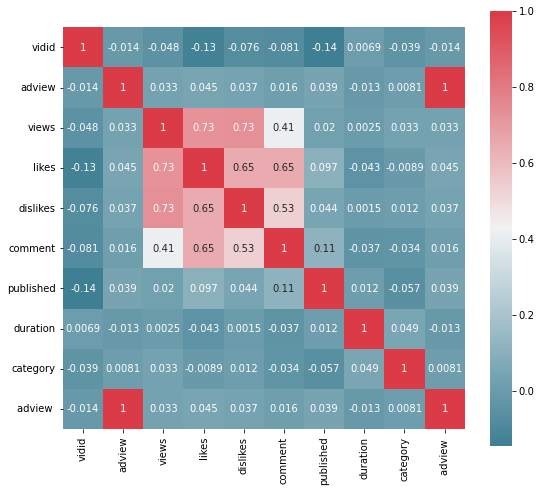

In [66]:
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(corelation, mask=np.zeros_like(corelation, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot=True)
plt.show()
     

In [67]:
#split the data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category,adview
0,1031602,8523,363,1095,2168,457,6,40
1,1707,56,2,6,2185,570,4,2
2,2023,25,0,2,2094,136,3,1
3,620860,777,161,153,2119,262,8,6
4,666,1,0,0,2091,31,4,1


In [68]:
data_train.iloc[:,-2:8]
data_train.iloc[:,2:8].values
data_train=data_train.dropna()
data_train

,views,likes,dislikes,comment,published,duration,category,adview
0,1031602,8523,363,1095,2168,457,6,40
1,1707,56,2,6,2185,570,4,2
2,2023,25,0,2,2094,136,3,1
3,620860,777,161,153,2119,262,8,6
4,666,1,0,0,2091,31,4,1
...,...,...,...,...,...,...,...,...
14994,525949,1137,83,86,1683,370,1,2
14995,665673,3849,156,569,1838,236,4,1
14996,3479,16,1,1,1053,193,2,4
14997,963,0,0,0,222,26,7,1


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11709, 8)
(2928, 8)
(11709, 1)
(2928, 1)


In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()
     

0.15234492632337204

In [71]:
from sklearn import metrics
Me=[0,0,0,0,0]
Mse=[0,0,0,0,0]
Rmse=[0,0,0,0,0]
def print_error(x_test, y_test, model_name):
  prediction = model_name.predict(x_test)
  a=metrics.mean_absolute_error(y_test, prediction)
  b=metrics.mean_squared_error(y_test, prediction)
  c=np.sqrt(b)
  print('Mean Error:', a)
  print('Mean Squared Error:', b)
  print('Root Mean Squared Error:', c)
  plt.figure(figsize=(10, 15))
  plt.scatter(range(len(prediction)), prediction, color='red', s=1)
  plt.scatter(range(len(y_test)), y_test, color='green', s=1)
  plt.show()
  return ([a,b,c])



Mean Error: 2463.6994339996522
Mean Squared Error: 5469033598.330312
Root Mean Squared Error: 73952.91473857073


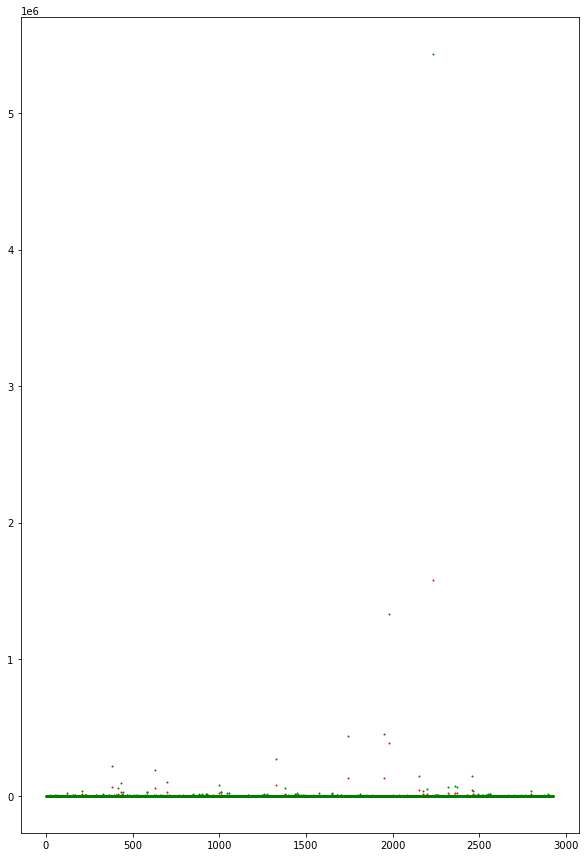

In [72]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
Me[0],Mse[0],Rmse[0]=print_error(X_test,y_test, linear_regression)
     

Mean Error: 3478.0336457819185
Mean Squared Error: 10901251576.247368
Root Mean Squared Error: 104409.05888019185


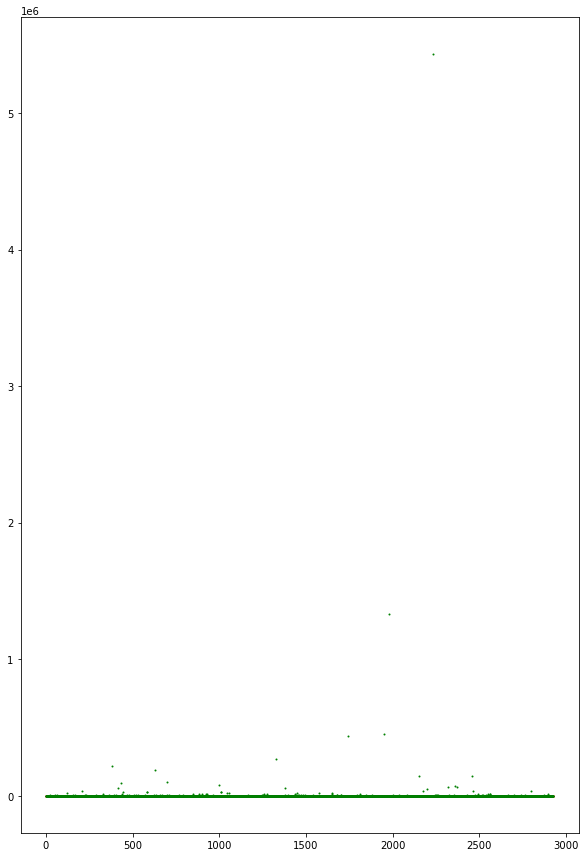

In [73]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train.values.ravel())
Me[1],Mse[1],Rmse[1]=print_error(X_test,y_test, supportvector_regressor)

Mean Error: 2771.3101092896177
Mean Squared Error: 8199555406.921448
Root Mean Squared Error: 90551.39649349118


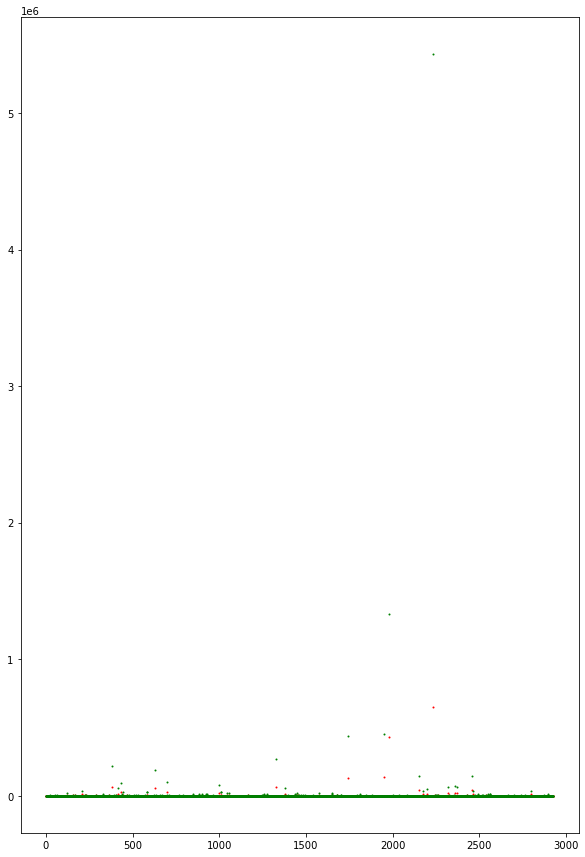

In [74]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
Me[2],Mse[2],Rmse[2]=print_error(X_test,y_test, decision_tree)

Mean Error: 2661.5290054396305
Mean Squared Error: 7144935806.347711
Root Mean Squared Error: 84527.72211734865


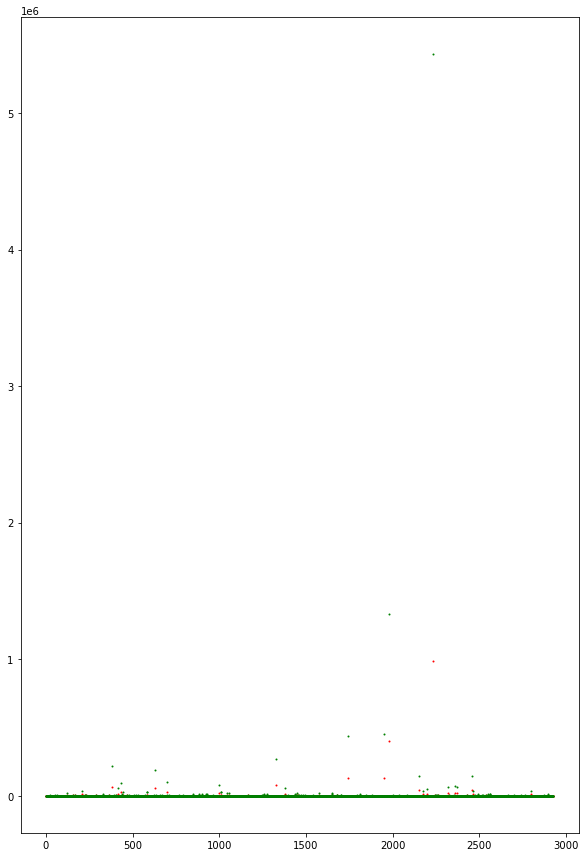

In [75]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators = n_estimators , max_depth = max_depth, min_samples_split =  min_samples_split  , min_samples_leaf = min_samples_leaf )
random_forest.fit(X_train,y_train.values.ravel())
Me[3],Mse[3],Rmse[3]=print_error(X_test,y_test, random_forest)

In [76]:
import numpy
numpy.version.version

'1.22.1'

In [77]:
!pip install tensorflow

In [78]:
!pip install keras

In [79]:
import sys
sys.executable

'D:\\anaconda\\python.exe'

In [80]:
import numpy
numpy.version.version

'1.22.1'

Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 767618432.0000 - mean_squared_error: 767618432.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767608576.0000 - mean_squared_error: 767608576.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767585920.0000 - mean_squared_error: 767585920.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767546496.0000 - mean_squared_error: 767546496.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767487424.0000 - mean_squared_error: 767487424.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767407808.0000 - mean_squared_error: 767407808.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767296704.0000 - mean_squared_error: 767296704.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767158784.0000 - mean_squared_error:

366/366 [==============================] - 1s 2ms/step - loss: 762688704.0000 - mean_squared_error: 762688704.0000
Epoch 66/100
366/366 [==============================] - 1s 2ms/step - loss: 762651904.0000 - mean_squared_error: 762651904.0000
Epoch 67/100
366/366 [==============================] - 1s 2ms/step - loss: 762615552.0000 - mean_squared_error: 762615552.0000
Epoch 68/100
366/366 [==============================] - 1s 2ms/step - loss: 762580480.0000 - mean_squared_error: 762580480.0000
Epoch 69/100
366/366 [==============================] - 1s 2ms/step - loss: 762551104.0000 - mean_squared_error: 762551104.0000
Epoch 70/100
366/366 [==============================] - 1s 2ms/step - loss: 762510848.0000 - mean_squared_error: 762510848.0000
Epoch 71/100
366/366 [==============================] - 1s 2ms/step - loss: 762473344.0000 - mean_squared_error: 762473344.0000
Epoch 72/100
366/366 [==============================] - 1s 2ms/step - loss: 762436160.0000 - mean_squared_error: 7624

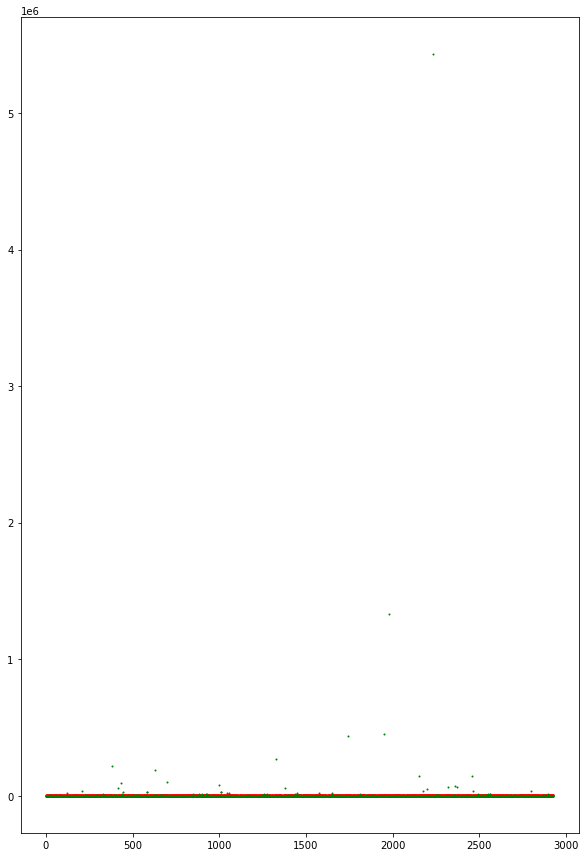

In [81]:
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
           Dense(6, activation="relu",
           input_shape=X_train.shape[1:]),
           Dense(6,activation="relu"),
           Dense(1)
           ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
Me[4],Mse[4],Rmse[4]=print_error(X_test,y_test,ann)

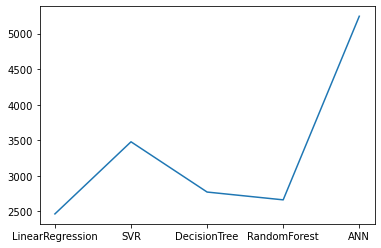

In [82]:
plt.plot(["LinearRegression","SVR","DecisionTree","RandomForest","ANN"],Me)
plt.show()

In [83]:
plt.plot(["LinearRegression","SVR","DecisionTree","RandomForest","ANN"]Mse)
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_30636/1510318724.py, line 1)

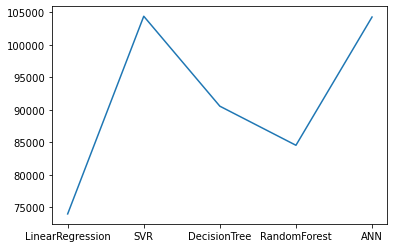

In [84]:
plt.plot(["LinearRegression","SVR","DecisionTree","RandomForest","ANN"],Rmse)
plt.show()

In [85]:
#Saving Scikitlearn models

import joblib
joblib.dump(supportvector_regressor, "First_Model_SVR_Youtube_Adview.pkl")
     

['First_Model_SVR_Youtube_Adview.pkl']

In [86]:
ann.save("First_Model_ANN_Youtube_Adview.h5")

In [87]:
test = pd.read_csv('train.csv')
test

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


In [88]:
test.head()
     

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [89]:
test.describe
     

<bound method NDFrame.describe of            vidid  adview    views likes dislikes comment   published duration  \
0      VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1      VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2       VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3      VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4      VID_10175       1      666     1        0       0  2016-06-29    PT31S   
...          ...     ...      ...   ...      ...     ...         ...      ...   
14994     VID_31       2   525949  1137       83      86  2015-05-18  PT6M10S   
14995   VID_5861       1   665673  3849      156     569  2015-10-20  PT3M56S   
14996    VID_805       4     3479    16        1       1  2013-08-23  PT3M13S   
14997  VID_19843       1      963     0        0       0  2010-10-02    PT26S   
14998   VID_8534       1    15212    22        5       4  2016-02-19   PT1M

In [92]:
data_train.isnull().any()


views        False
likes        False
dislikes     False
comment      False
published    False
duration     False
category     False
adview       False
dtype: bool

In [93]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
test["category"]=test["category"].map(category)
test

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,NaN
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,NaN
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,NaN
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,NaN
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,NaN
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,NaN
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,NaN
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,NaN
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,NaN


In [94]:
test=test[test.views!='F']
test=test[test.likes!='F']
test=test[test.dislikes!='F']
test=test[test.comment!='F']
test

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,NaN
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,NaN
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,NaN
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,NaN
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,NaN
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,NaN
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,NaN
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,NaN
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,NaN


In [95]:
test["views"] = pd.to_numeric(test["views"])
test["comment"] = pd.to_numeric(test["comment"])
test["likes"] = pd.to_numeric(test["likes"])
test["dislikes"] = pd.to_numeric(test["dislikes"])
test["adview"]=pd.to_numeric(test["adview"])
column_vidid_2=test['vidid']
test

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,NaN
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,NaN
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,NaN
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,NaN
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,NaN
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,NaN
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,NaN
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,NaN
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,NaN


In [96]:
from sklearn.preprocessing import LabelEncoder
test['duration']=LabelEncoder().fit_transform(test['duration'])
test['vidid']=LabelEncoder().fit_transform(test['vidid'])
test['published']=LabelEncoder().fit_transform(test['published'])
test

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,NaN
1,2741,2,1707,56,2,6,2185,3040,NaN
2,8138,1,2023,25,0,2,2094,1863,NaN
3,9005,6,620860,777,161,153,2119,2546,NaN
4,122,1,666,1,0,0,2091,1963,NaN
...,...,...,...,...,...,...,...,...,...
14994,9869,2,525949,1137,83,86,1683,2833,NaN
14995,11758,1,665673,3849,156,569,1838,2257,NaN
14996,13263,4,3479,16,1,1,1053,2210,NaN
14997,6736,1,963,0,0,0,222,1364,NaN


In [97]:
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
  train=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

test["duration"]=time1
test.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,449.0,NaN
1,2741,2,1707,56,2,6,2185,389.0,NaN
2,8138,1,2023,25,0,2,2094,2274.0,NaN
3,9005,6,620860,777,161,153,2119,595.0,NaN
4,122,1,666,1,0,0,2091,188.0,NaN


In [98]:
test.iloc[:,-2:8]
test.iloc[:,2:8].values
test=test.dropna()
test=test.drop(["adview"],axis=1)
test=test.drop(["vidid"],axis=1)
test

,views,likes,dislikes,comment,published,duration,category


In [104]:
import joblib
classifier = joblib.load("First_Model_SVR_Youtube_Adview.pkl")
prediction = classifier.predict(data_train)
     

In [105]:
prediction

array([5.74796801, 5.74796801, 5.74796801, ..., 5.74796801, 5.74796801,
       5.74796801])

In [106]:
np.savetxt('Prediction_Submission1.csv',prediction,delimiter=',')